<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [15]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [16]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [17]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [18]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [19]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [20]:
Tesla = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [27]:
Tesla_data = Tesla.history(period="max")

# Display the first few rows of the downloaded data
print(Tesla_data.head())



                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [32]:

tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data DataFrame
print(tesla_data.head())


   level_0  index                      Date      Open      High       Low  \
0        0      0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333   
1        1      1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333   
2        2      2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333   
3        3      3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333   
4        4      4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333   

      Close     Volume  Dividends  Stock Splits  
0  1.592667  281494500        0.0           0.0  
1  1.588667  257806500        0.0           0.0  
2  1.464000  123282000        0.0           0.0  
3  1.280000   77097000        0.0           0.0  
4  1.074000  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [33]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)
# Save the text of the response as a variable named html_data
html_data = response.text
print(html_data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`. Make sure to use the `html_data` with the content parameter as follow `html_data.content` .


In [34]:
soup = BeautifulSoup(html_data, 'html5lib')

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Find All Tables: Start by searching for all HTML tables on a webpage using `soup.find_all('table')`.
2. Identify the Relevant Table: then loops through each table. If a table contains the text “Tesla Quarterly Revenue,”, select that table.
3. Initialize a DataFrame: Create an empty Pandas DataFrame called `tesla_revenue` with columns “Date” and “Revenue.”
4. Loop Through Rows: For each row in the relevant table, extract the data from the first and second columns (date and revenue).
5. Clean Revenue Data: Remove dollar signs and commas from the revenue value.
6. Add Rows to DataFrame: Create a new row in the DataFrame with the extracted date and cleaned revenue values.
7. Repeat for All Rows: Continue this process for all rows in the table.

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [35]:
# Find the table containing Tesla Revenue data (assuming it's the first table on the page)
table = soup.find_all('table')[0]

# Extract data from the table into lists
dates = []
revenues = []

for row in table.find_all('tr')[1:]:
    date = row.find_all('td')[0].text.strip()
    revenue = row.find_all('td')[1].text.strip()
    dates.append(date)
    revenues.append(revenue)

# Create a DataFrame named tesla_revenue
tesla_revenue = pd.DataFrame({
    'Date': dates,
    'Revenue': revenues
})

# Display the DataFrame
print(tesla_revenue.head())

   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [36]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [37]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [38]:
print(tesla_revenue.tail())


    Date Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [39]:
gme = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [40]:
gme_data = gme.history(period="max")

print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670625  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [41]:
gme_data.reset_index(inplace=True)

## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [42]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

response = requests.get(url)

# Save the text of the response as a variable named html_data_2
html_data_2 = response.text
print(html_data_2)

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta http-equiv="Content-Type" content="text/html; charset=UTF-8"><script type="text/javascript" async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download"></script><script async="" type="text/javascript" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download"></script><script async="" src="./

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [43]:
soup = BeautifulSoup(html_data_2, 'html5lib')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [44]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

# URL of the webpage to be downloaded
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Download the webpage
response = requests.get(url)

# Save the text of the response as a variable named html_data_2
html_data_2 = response.text

# Parse the HTML data using BeautifulSoup with html5lib parser
soup = BeautifulSoup(html_data_2, 'html5lib')

# Find the table containing GameStop Revenue data (assuming it's the first table on the page)
table = soup.find_all('table')[0]

# Extract data from the table into lists
dates = []
revenues = []

for row in table.find_all('tr')[1:]:
    date = row.find_all('td')[0].text.strip()
    revenue_str = row.find_all('td')[1].text.strip()
    # Remove commas and dollar signs from revenue string
    revenue = float(revenue_str.replace(',', '').replace('$', ''))
    dates.append(date)
    revenues.append(revenue)

# Create a DataFrame named gme_revenue
gme_revenue = pd.DataFrame({
    'Date': dates,
    'Revenue': revenues
})

# Display the first few rows of the gme_revenue DataFrame
print(gme_revenue.head())


   Date  Revenue
0  2020   6466.0
1  2019   8285.0
2  2018   8547.0
3  2017   7965.0
4  2016   9364.0


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [45]:
print(gme_revenue.tail())


    Date  Revenue
11  2009   8806.0
12  2008   7094.0
13  2007   5319.0
14  2006   3092.0
15  2005   1843.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [46]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


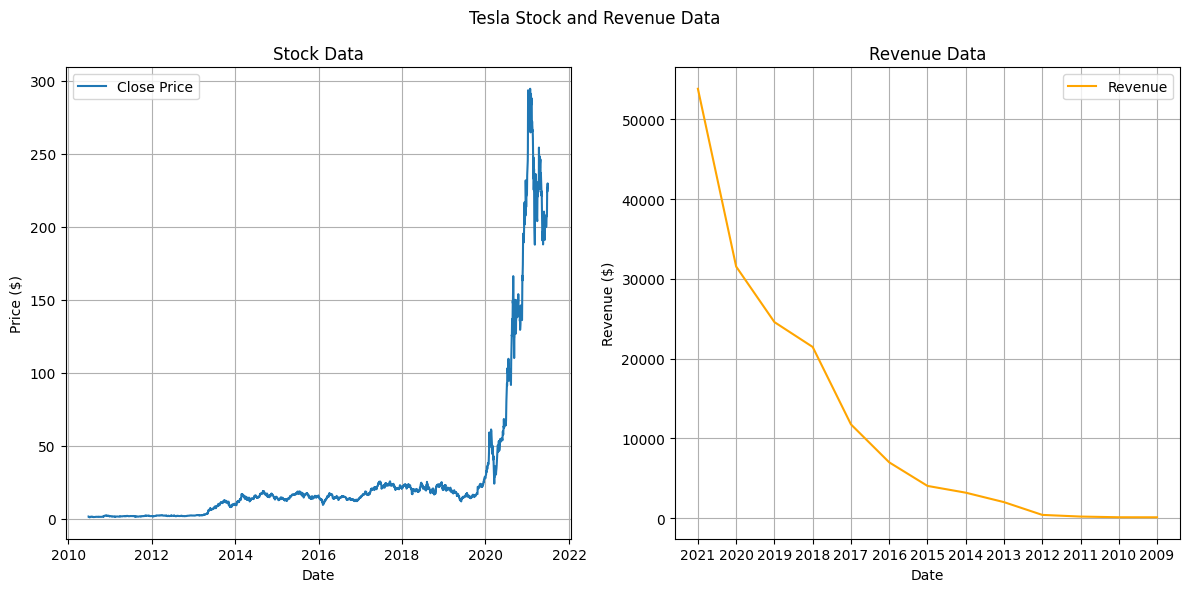

In [47]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup


# Define the make_graph function (assuming it's defined elsewhere)
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12, 6))

    # Plot stock data
    plt.subplot(1, 2, 1)  # Create subplot for stock data
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    plt.title('Stock Data')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)

    # Plot revenue data
    plt.subplot(1, 2, 2)  # Create subplot for revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='orange')
    plt.title('Revenue Data')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.legend()
    plt.grid(True)

    # Overall title for the entire plot
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Function to retrieve stock data using yfinance
def get_stock_data(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    data = stock.history(start=start_date, end=end_date)
    return data

# Function to retrieve revenue data using BeautifulSoup
def get_revenue_data(url):
    response = requests.get(url)
    html_data = response.text
    soup = BeautifulSoup(html_data, 'html.parser')
    
    table = soup.find('table')
    headers = ['Date', 'Revenue']
    rows = []
    
    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        rows.append({
            'Date': cols[0].get_text().strip(),
            'Revenue': float(cols[1].get_text().strip().replace(',', '').replace('$', ''))
        })
    
    revenue_data = pd.DataFrame(rows, columns=headers)
    return revenue_data

# Example usage: Get Tesla stock data and revenue data
tesla_stock_data = get_stock_data("TSLA", "2010-01-01", "2021-06-30")
tesla_revenue_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
tesla_revenue_data = get_revenue_data(tesla_revenue_url)

# Plot Tesla stock data and revenue data using make_graph function
make_graph(tesla_stock_data, tesla_revenue_data, 'Tesla Stock and Revenue Data')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


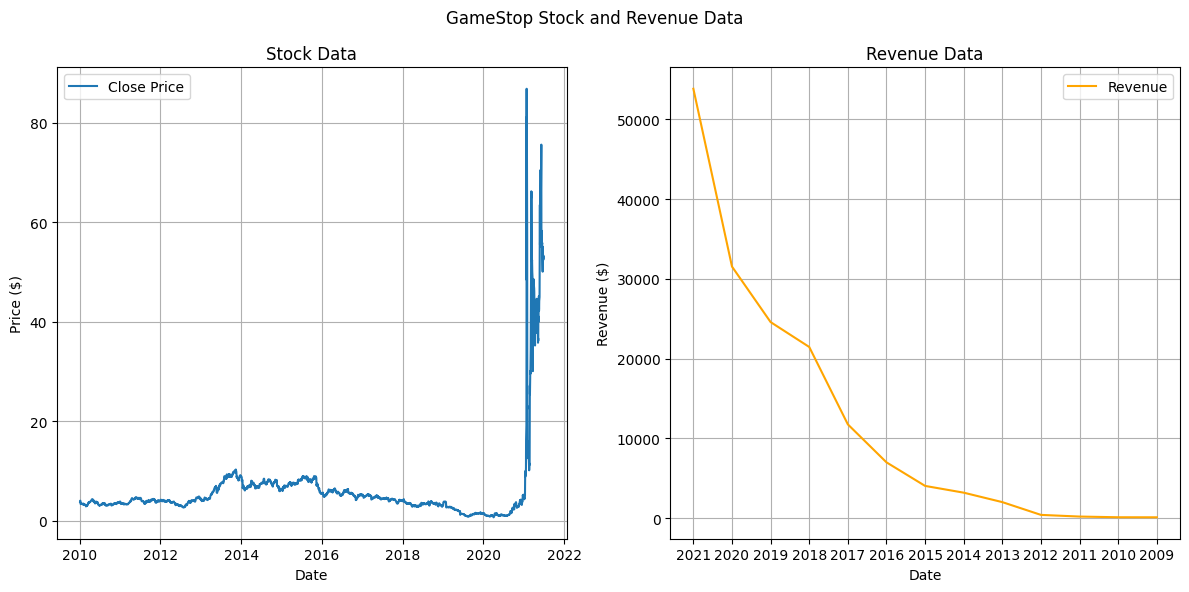

In [49]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define the make_graph function (assuming it's defined elsewhere)
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(12, 6))

    # Plot stock data
    plt.subplot(1, 2, 1)  # Create subplot for stock data
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    plt.title('Stock Data')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True)

    # Plot revenue data
    plt.subplot(1, 2, 2)  # Create subplot for revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='orange')
    plt.title('Revenue Data')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.legend()
    plt.grid(True)

    # Overall title for the entire plot
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Function to retrieve stock data using yfinance
def get_stock_data(symbol, start_date, end_date):
    stock = yf.Ticker(symbol)
    data = stock.history(start=start_date, end=end_date)
    return data

# Function to retrieve revenue data using BeautifulSoup
def get_revenue_data(url):
    response = requests.get(url)
    html_data = response.text
    soup = BeautifulSoup(html_data, 'html.parser')
    
    table = soup.find('table')
    headers = ['Date', 'Revenue']
    rows = []
    
    for row in table.find_all('tr')[1:]:
        cols = row.find_all('td')
        rows.append({
            'Date': cols[0].get_text().strip(),
            'Revenue': float(cols[1].get_text().strip().replace(',', '').replace('$', ''))
        })
    
    revenue_data = pd.DataFrame(rows, columns=headers)
    return revenue_data

# Example usage: Get GameStop stock data and revenue data
gme_stock_data = get_stock_data("GME", "2010-01-01", "2021-06-30")
gme_revenue_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
gme_revenue_data = get_revenue_data(gme_revenue_url)

# Plot GameStop stock data and revenue data using make_graph function
make_graph(gme_stock_data, gme_revenue_data, 'GameStop Stock and Revenue Data')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
